<a href="https://colab.research.google.com/github/ywon/Computer_Graphics/blob/main/monte_carlo_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

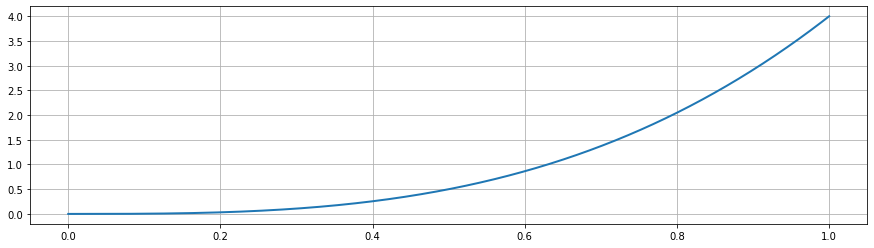

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.figsize"] = (15,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

def function(x):
    return((4)*(x**3))

X=np.linspace(0,1,1000)
plt.plot(X,function(X))
plt.show()

0.9934999999999999


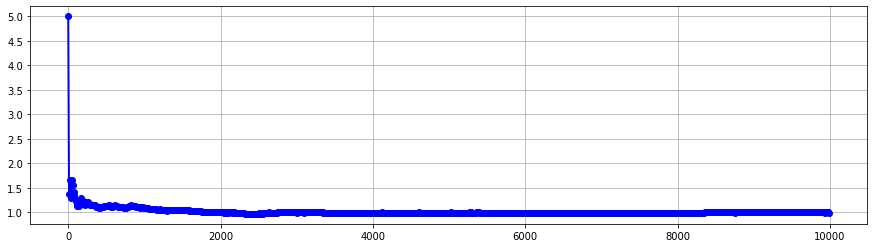

In [34]:
graph_x=[]
graph_y=[]

def integrate(x1,x2,func=function,n=10000):
    X=np.linspace(x1,x2,1000)
    y1=0
    y2=max((func(X)))+1
    #print('x1:'+str(x1)+',','x2:'+str(x2)+',','y1:'+str(y1)+',','y2:'+str(y2))
    area=(x2-x1)*(y2-y1)
    check=[]
    xs=[]
    ys=[]
    
    for i in range(n):
        x=np.random.uniform(x1,x2,1)
        xs.append(x)
        y=np.random.uniform(y1,y2,1)
        ys.append(y)
        if abs(y)>abs(func(x)) or y<0:
            check.append(0)
        else:
            check.append(1)

        if(i%10==0):
          graph_x.append(i)
          graph_y.append(np.mean(check)*area)
    return(np.mean(check)*area,xs,ys,check)
   

print(integrate(0,1)[0])
plt.plot(graph_x, graph_y, color='blue', marker='o', linestyle = 'solid')
plt.show()

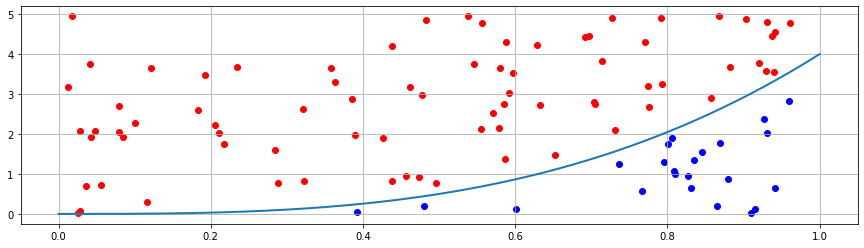

In [35]:
_,x,y,c=integrate(0, 1, function, n=100)
df=pd.DataFrame()
df['x']=x
df['y']=y
df['c']=c

X=np.linspace(0, 1, 1000)
plt.plot(X,function(X))
plt.scatter(df[df['c']==0]['x'],df[df['c']==0]['y'],color='red')
plt.scatter(df[df['c']==1]['x'],df[df['c']==1]['y'],color='blue')
plt.show()